# Object classification using Fashion MNIST dataset

Fashion MNIST is the basic grayscale image dataset. Goal here is the object classification using various deep learning techniques such as ANN, CNN

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Loading Dataset

In [3]:
# Import the dataset
fminst = keras.datasets.fashion_mnist

In [4]:
# split the dataset into training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = fminst.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
# split the training data further into trining and validation for hyperparameter tuning nad normalizing it.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
y_train.shape

(55000,)

In [10]:
# List of fashion items we are dealing with
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[101]]

'Sneaker'

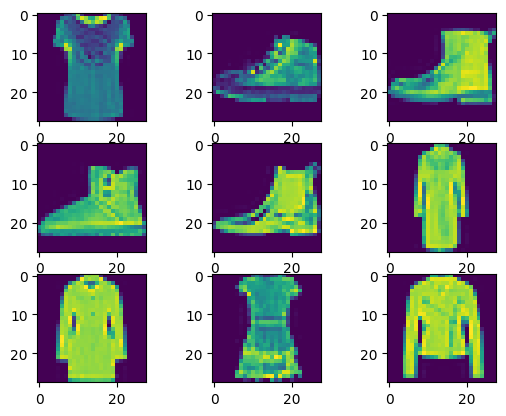

In [12]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(X_train[i])

# Display the entire plot
plt.show()


### creating model using sequential API

First let's create the basic fully connected sequential artificial neural network then we can choose the hyperparameters and check and create more accurate model. This basic neural network contains one flatten input layer with 28*28 neurons, one output layer with 10 neurons, and two hidden layers with 300 and 100 neurons.

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])),
model.add(keras.layers.Dense(300, activation='relu')),
model.add(keras.layers.Dense(100, activation='relu')),
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


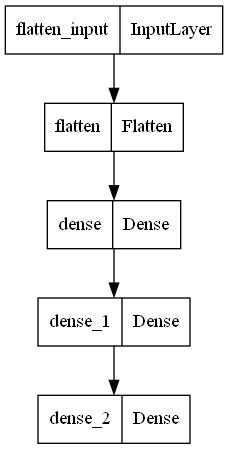

In [38]:
#keras.utils.plot_model(model)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [20]:
tensorboard_cb = keras.callbacks.TensorBoard('logs\100')

In [21]:
history = model.fit(X_train, y_train, epochs=40, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/40
1719/1719 [==============================] - 31s 12ms/step - loss: 0.7122 - accuracy: 0.7667 - val_loss: 0.5129 - val_accuracy: 0.8284
Epoch 2/40
1719/1719 [==============================] - 74s 43ms/step - loss: 0.4896 - accuracy: 0.8285 - val_loss: 0.4493 - val_accuracy: 0.8474
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4454 - accuracy: 0.8441 - val_loss: 0.4119 - val_accuracy: 0.8618
Epoch 4/40
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4179 - accuracy: 0.8529 - val_loss: 0.4173 - val_accuracy: 0.8540
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8604 - val_loss: 0.3848 - val_accuracy: 0.8680
Epoch 6/40
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3807 - accuracy: 0.8659 - val_loss: 0.3693 - val_accuracy: 0.8730
Epoch 7/40
1719/1719 [==============================] - 31s 18ms/step - loss: 0.3684 - accuracy: 0.8696 - val_loss: 0.3623 - val_

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.1833 - accuracy: 0.8583


[64.18326568603516, 0.858299970626831]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [25]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

1/1 [==============================] - 0s 22ms/step
Ankle boot


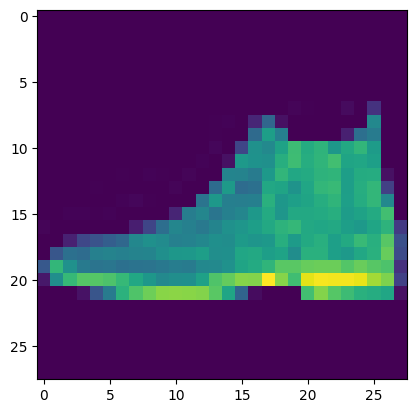

In [26]:
predictions = model.predict(X_test[:1])
label = class_names[np.argmax(predictions)]

print(label)
plt.imshow(X_test[:1][0])
plt.show()

<AxesSubplot: >

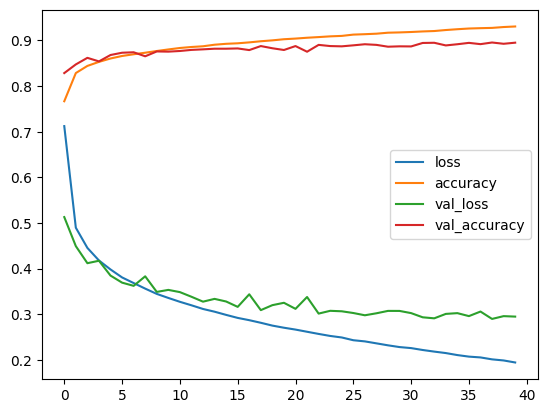

In [27]:
pd.DataFrame(history.history).plot()

This basic model has validation accuracy of around 90%

### Hyperparameter Tuning

There are several hyperparameters to tweak here we will tweak number of layers, number of hidden layers, learning rate, epoches, and batch size. For hyperparameter tuning we can use RandomizedSearchCV from sklearn.

In [28]:
def build_model(n_hidden=1, n_neuron=96, learning_rate=3e-2, input_shape=[28, 28]):
    model = keras.models.Sequential()
    #model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Flatten(input_shape=input_shape)),
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neuron, activation='relu'))
    #model.add(keras.layers.Dense(1))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    #model.compile(loss='mse', optimizer=optimizer, metrics=["accuracy"])
    model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
    return model

In [29]:
# Wrap model from a function to the keras classifier
keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\rakes\AppData\Local\Temp\ipykernel_944\4278455728.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [31]:
batch_size = np.arange(150)
epochs = np.arange(150)

# Define the grid search
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = RandomizedSearchCV(keras_clas, param_grid, n_jobs=5, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train, batch_size=32, epochs=50,
              validation_data=(X_valid, y_valid))


Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6198 - accuracy: 0.7883 - val_loss: 0.4851 - val_accuracy: 0.8366
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4605 - accuracy: 0.8390 - val_loss: 0.4368 - val_accuracy: 0.8502
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4190 - accuracy: 0.8537 - val_loss: 0.4259 - val_accuracy: 0.8454
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3954 - accuracy: 0.8597 - val_loss: 0.4047 - val_accuracy: 0.8594
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8672 - val_loss: 0.3738 - val_accuracy: 0.8690
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.8728 - val_loss: 0.3656 - val_accuracy: 0.8762
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3474 - accuracy: 0.8763 - val_loss: 0.3655 - val_accuracy:

In [32]:
# Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.887909 using {'epochs': 125, 'batch_size': 56}


In [33]:
# Define parameters
parameters = {
    'n_hidden':[1, 2, 3],
    'n_neuron': np.arange(60, 151),
    'learning_rate': [3e-3, 3e-2, 3e-1]
}

rnd_search = RandomizedSearchCV(keras_clas, parameters, n_iter=5, cv=3)

#tensorboard_cb = keras.callbacks.TensorBoard('logs/search2')

# Train model to find values of hyperparameters
grid_result1 = rnd_search.fit(X_train, y_train, batch_size=56, epochs=125,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/125
655/655 [==============================] - 2s 2ms/step - loss: 1.4793 - accuracy: 0.5760 - val_loss: 1.0350 - val_accuracy: 0.6954
Epoch 2/125
655/655 [==============================] - 1s 2ms/step - loss: 0.9057 - accuracy: 0.7212 - val_loss: 0.8054 - val_accuracy: 0.7500
Epoch 3/125
655/655 [==============================] - 1s 2ms/step - loss: 0.7632 - accuracy: 0.7578 - val_loss: 0.7140 - val_accuracy: 0.7732
Epoch 4/125
655/655 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.7767 - val_loss: 0.6601 - val_accuracy: 0.7928
Epoch 5/125
655/655 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.7905 - val_loss: 0.6259 - val_accuracy: 0.7998
Epoch 6/125
655/655 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.7983 - val_loss: 0.5982 - val_accuracy: 0.8076
Epoch 7/125
655/655 [==============================] - 1s 2ms/step - loss: 0.5928 - accuracy: 0.8057 - val_loss: 0.5782 - val_accuracy: 0.8098

Epoch 58/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8648 - val_loss: 0.4125 - val_accuracy: 0.8654
Epoch 59/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8648 - val_loss: 0.4097 - val_accuracy: 0.8676
Epoch 60/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.8686
Epoch 61/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8661 - val_loss: 0.4064 - val_accuracy: 0.8664
Epoch 62/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8656 - val_loss: 0.4045 - val_accuracy: 0.8644
Epoch 63/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8666 - val_loss: 0.4051 - val_accuracy: 0.8664
Epoch 64/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8668 - val_loss: 0.4065 - val_accuracy:

Epoch 115/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8813 - val_loss: 0.3829 - val_accuracy: 0.8732
Epoch 116/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8816 - val_loss: 0.3777 - val_accuracy: 0.8716
Epoch 117/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8820 - val_loss: 0.3794 - val_accuracy: 0.8718
Epoch 118/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8815 - val_loss: 0.3777 - val_accuracy: 0.8730
Epoch 119/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8823 - val_loss: 0.3789 - val_accuracy: 0.8738
Epoch 120/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8818 - val_loss: 0.3776 - val_accuracy: 0.8746
Epoch 121/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8826 - val_loss: 0.3765 - val_ac

655/655 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.4216 - val_accuracy: 0.8556
Epoch 47/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8553 - val_loss: 0.4216 - val_accuracy: 0.8546
Epoch 48/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8553 - val_loss: 0.4224 - val_accuracy: 0.8544
Epoch 49/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8564 - val_loss: 0.4185 - val_accuracy: 0.8580
Epoch 50/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8562 - val_loss: 0.4195 - val_accuracy: 0.8580
Epoch 51/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8570 - val_loss: 0.4156 - val_accuracy: 0.8580
Epoch 52/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8574 - val_loss: 0.4152 - val_accuracy: 0.8594
Epoch

Epoch 103/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8749 - val_loss: 0.3839 - val_accuracy: 0.8656
Epoch 104/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8759 - val_loss: 0.3798 - val_accuracy: 0.8686
Epoch 105/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8759 - val_loss: 0.3823 - val_accuracy: 0.8690
Epoch 106/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8756 - val_loss: 0.3828 - val_accuracy: 0.8668
Epoch 107/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8772 - val_loss: 0.3856 - val_accuracy: 0.8674
Epoch 108/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8768 - val_loss: 0.3789 - val_accuracy: 0.8682
Epoch 109/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8767 - val_loss: 0.3811 - val_ac

655/655 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8520 - val_loss: 0.4317 - val_accuracy: 0.8586
Epoch 35/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8526 - val_loss: 0.4299 - val_accuracy: 0.8534
Epoch 36/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8546 - val_loss: 0.4329 - val_accuracy: 0.8550
Epoch 37/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.8549 - val_loss: 0.4280 - val_accuracy: 0.8580
Epoch 38/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8546 - val_loss: 0.4252 - val_accuracy: 0.8616
Epoch 39/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8545 - val_loss: 0.4256 - val_accuracy: 0.8582
Epoch 40/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8561 - val_loss: 0.4210 - val_accuracy: 0.8618
Epoch

Epoch 91/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8765 - val_loss: 0.3777 - val_accuracy: 0.8710
Epoch 92/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8759 - val_loss: 0.3794 - val_accuracy: 0.8702
Epoch 93/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8764 - val_loss: 0.3809 - val_accuracy: 0.8696
Epoch 94/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8771 - val_loss: 0.3770 - val_accuracy: 0.8718
Epoch 95/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8776 - val_loss: 0.3786 - val_accuracy: 0.8700
Epoch 96/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8776 - val_loss: 0.3785 - val_accuracy: 0.8696
Epoch 97/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8776 - val_loss: 0.3757 - val_accuracy:

655/655 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.8309 - val_loss: 0.5166 - val_accuracy: 0.8230
Epoch 3/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8473 - val_loss: 0.4839 - val_accuracy: 0.8198
Epoch 4/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8573 - val_loss: 0.3799 - val_accuracy: 0.8666
Epoch 5/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8663 - val_loss: 0.3608 - val_accuracy: 0.8714
Epoch 6/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8686 - val_loss: 0.3573 - val_accuracy: 0.8658
Epoch 7/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8738 - val_loss: 0.3809 - val_accuracy: 0.8634
Epoch 8/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8785 - val_loss: 0.3746 - val_accuracy: 0.8642
Epoch 9/125

Epoch 9/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2901 - accuracy: 0.8908 - val_loss: 0.3595 - val_accuracy: 0.8746
Epoch 10/125
655/655 [==============================] - 2s 3ms/step - loss: 0.2833 - accuracy: 0.8928 - val_loss: 0.3290 - val_accuracy: 0.8846
Epoch 11/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2724 - accuracy: 0.8964 - val_loss: 0.3771 - val_accuracy: 0.8714
Epoch 12/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2620 - accuracy: 0.9009 - val_loss: 0.3326 - val_accuracy: 0.8820
Epoch 13/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2554 - accuracy: 0.9031 - val_loss: 0.3586 - val_accuracy: 0.8792
Epoch 14/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2536 - accuracy: 0.9041 - val_loss: 0.3582 - val_accuracy: 0.8796
Epoch 15/125
655/655 [==============================] - 2s 2ms/step - loss: 0.2461 - accuracy: 0.9071 - val_loss: 0.3512 - val_accuracy: 

655/655 [==============================] - 1s 2ms/step - loss: 0.4602 - accuracy: 0.8373 - val_loss: 0.4334 - val_accuracy: 0.8444
Epoch 4/125
655/655 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8483 - val_loss: 0.4077 - val_accuracy: 0.8512
Epoch 5/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8595 - val_loss: 0.4102 - val_accuracy: 0.8548
Epoch 6/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3794 - accuracy: 0.8636 - val_loss: 0.3884 - val_accuracy: 0.8602
Epoch 7/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8702 - val_loss: 0.3660 - val_accuracy: 0.8676
Epoch 8/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8740 - val_loss: 0.3609 - val_accuracy: 0.8700
Epoch 9/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8760 - val_loss: 0.3551 - val_accuracy: 0.8680
Epoch 10/12

655/655 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.9125 - val_loss: 0.3176 - val_accuracy: 0.8860
Epoch 29/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9141 - val_loss: 0.3525 - val_accuracy: 0.8792
Epoch 30/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9129 - val_loss: 0.3424 - val_accuracy: 0.8794
Epoch 31/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2230 - accuracy: 0.9173 - val_loss: 0.3303 - val_accuracy: 0.8798
Epoch 32/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2199 - accuracy: 0.9177 - val_loss: 0.3313 - val_accuracy: 0.8798
Epoch 33/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9193 - val_loss: 0.3387 - val_accuracy: 0.8800
Epoch 34/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9208 - val_loss: 0.3255 - val_accuracy: 0.8890
Epoch

Epoch 13/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8806 - val_loss: 0.3607 - val_accuracy: 0.8758
Epoch 14/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8816 - val_loss: 0.3557 - val_accuracy: 0.8774
Epoch 15/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8836 - val_loss: 0.3484 - val_accuracy: 0.8828
Epoch 16/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8866 - val_loss: 0.3534 - val_accuracy: 0.8756
Epoch 17/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8877 - val_loss: 0.3777 - val_accuracy: 0.8710
Epoch 18/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.8895 - val_loss: 0.3487 - val_accuracy: 0.8796
Epoch 19/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.8906 - val_loss: 0.3617 - val_accuracy:

655/655 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8840 - val_loss: 0.3526 - val_accuracy: 0.8766
Epoch 17/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8862 - val_loss: 0.3453 - val_accuracy: 0.8784
Epoch 18/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8870 - val_loss: 0.3437 - val_accuracy: 0.8778
Epoch 19/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.8884 - val_loss: 0.3693 - val_accuracy: 0.8698
Epoch 20/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.8897 - val_loss: 0.3977 - val_accuracy: 0.8562
Epoch 21/125
655/655 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8918 - val_loss: 0.3393 - val_accuracy: 0.8794
Epoch 22/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8932 - val_loss: 0.3362 - val_accuracy: 0.8798
Epoch

655/655 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.9014 - val_loss: 0.3366 - val_accuracy: 0.8774
Epoch 29/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2746 - accuracy: 0.9027 - val_loss: 0.3303 - val_accuracy: 0.8796
Epoch 30/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9033 - val_loss: 0.3241 - val_accuracy: 0.8814
Epoch 31/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9052 - val_loss: 0.3317 - val_accuracy: 0.8800
Epoch 32/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.9063 - val_loss: 0.3296 - val_accuracy: 0.8848
Epoch 33/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2608 - accuracy: 0.9072 - val_loss: 0.3430 - val_accuracy: 0.8740
Epoch 34/125
655/655 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9081 - val_loss: 0.3424 - val_accuracy: 0.8784
Epoch

983/983 [==============================] - 2s 2ms/step - loss: 0.2365 - accuracy: 0.9149 - val_loss: 0.3084 - val_accuracy: 0.8834
Epoch 37/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2335 - accuracy: 0.9166 - val_loss: 0.3255 - val_accuracy: 0.8836
Epoch 38/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2319 - accuracy: 0.9167 - val_loss: 0.3005 - val_accuracy: 0.8906
Epoch 39/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2289 - accuracy: 0.9184 - val_loss: 0.3007 - val_accuracy: 0.8910
Epoch 40/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2273 - accuracy: 0.9199 - val_loss: 0.3029 - val_accuracy: 0.8926
Epoch 41/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2242 - accuracy: 0.9199 - val_loss: 0.3385 - val_accuracy: 0.8826
Epoch 42/125
983/983 [==============================] - 2s 2ms/step - loss: 0.2217 - accuracy: 0.9213 - val_loss: 0.3194 - val_accuracy: 0.8832
Epoch

In [35]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: 0.883982 using {'n_neuron': 138, 'n_hidden': 1, 'learning_rate': 0.03}


In [37]:
# batch normalization
def final_model(n_hidden=1, n_neuron=138, learning_rate=3e-2, input_shape=[28, 28]):
    model = keras.models.Sequential()
    #model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Flatten(input_shape=input_shape)),
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neuron, activation='relu'))
    #model.add(keras.layers.Dense(1))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)#, decay=1e-4)
    #model.compile(loss='mse', optimizer=optimizer, metrics=["accuracy"])
    model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
    return model

tensorboard_cb = keras.callbacks.TensorBoard('logs/200')

keras_clas1 = keras.wrappers.scikit_learn.KerasClassifier(final_model)

history1 = keras_clas1.fit(X_train, y_train, batch_size=32, epochs=60,
                   validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10), tensorboard_cb])

C:\Users\rakes\AppData\Local\Temp\ipykernel_944\2568471483.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clas1 = keras.wrappers.scikit_learn.KerasClassifier(final_model)


Epoch 1/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6149 - accuracy: 0.7895 - val_loss: 0.4719 - val_accuracy: 0.8412
Epoch 2/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8426 - val_loss: 0.4600 - val_accuracy: 0.8318
Epoch 3/60
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4104 - accuracy: 0.8553 - val_loss: 0.4269 - val_accuracy: 0.8514
Epoch 4/60
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3844 - accuracy: 0.8645 - val_loss: 0.3936 - val_accuracy: 0.8612
Epoch 5/60
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3654 - accuracy: 0.8693 - val_loss: 0.3566 - val_accuracy: 0.8758
Epoch 6/60
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3497 - accuracy: 0.8753 - val_loss: 0.3619 - val_accuracy: 0.8698
Epoch 7/60
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3381 - accuracy: 0.8779 - val_loss: 0.3669 - val_accu

In [35]:
# https://www.geeksforgeeks.org/fashion-mnist-with-python-keras-and-deep-learning/

<AxesSubplot: >

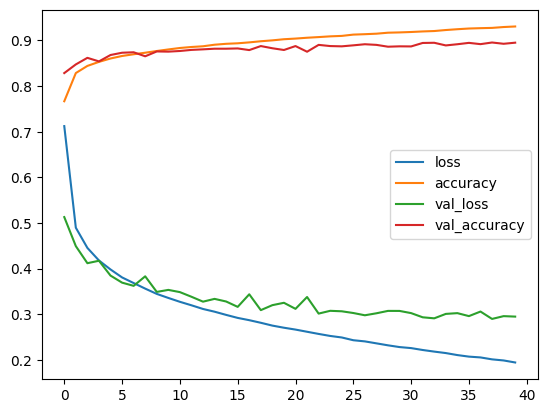

In [38]:
pd.DataFrame(history.history).plot()

#### Final Accuracy achieved= 98.94%

In [ ]:
keras_clas1.evaluate(X_test, y_test)